In [141]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

# Los gráficos en formato retina son más nítidos y legibles
%config InlineBackend.figure_format = 'retina'

In [5]:
#Cargamos los datos
df= pd.read_csv('/linelist_cleaned.csv')
df.head()

,case_id,generation,date_infection,date_onset,date_hospitalisation,date_outcome,outcome,gender,age,age_unit,...,ct_blood,fever,chills,cough,aches,vomit,temp,time_admission,bmi,days_onset_hosp
0,5fe599,4,05/08/2014,05/13/2014,05/15/2014,NaN,NaN,m,2.0,years,...,22,no,no,yes,no,yes,36.8,NaN,117.187500,2.0
1,8689b7,4,NaN,05/13/2014,05/14/2014,05/18/2014,Recover,f,3.0,years,...,22,NaN,NaN,NaN,NaN,NaN,36.9,09:36,71.818443,1.0
2,11f8ea,2,NaN,05/16/2014,05/18/2014,05/30/2014,Recover,m,56.0,years,...,21,NaN,NaN,NaN,NaN,NaN,36.9,16:48,16.065250,2.0
3,b8812a,3,05/04/2014,05/18/2014,05/20/2014,NaN,NaN,f,18.0,years,...,23,no,no,no,no,no,36.8,11:22,22.496571,2.0
4,893f25,3,05/18/2014,05/21/2014,05/22/2014,05/29/2014,Recover,m,3.0,years,...,23,no,no,yes,no,yes,36.9,12:60,71.414402,1.0


Limpiamos los datos

In [6]:
#Notamos que solo nos interesan las variables de  age, wt_kg y gender para las primeras gráficas 

D2 = df[['case_id', 'gender','age','wt_kg']]
D2.head()


,case_id,gender,age,wt_kg
0,5fe599,m,2.0,27
1,8689b7,f,3.0,25
2,11f8ea,m,56.0,91
3,b8812a,f,18.0,41
4,893f25,m,3.0,36


In [7]:
D2.isnull().sum()

case_id      0
gender     278
age         86
wt_kg        0
dtype: int64

In [8]:
D2.shape


(5888, 4)

In [9]:
#Notamos que no hay tantos datos faltantes de los totales, por lo que los eliminamos
D2=D2.dropna()
D2.isnull().sum()

case_id    0
gender     0
age        0
wt_kg      0
dtype: int64

In [10]:
#Ahora si empezamos el analisis 


1.1 Cantidad de casos conforme a grupos de edad

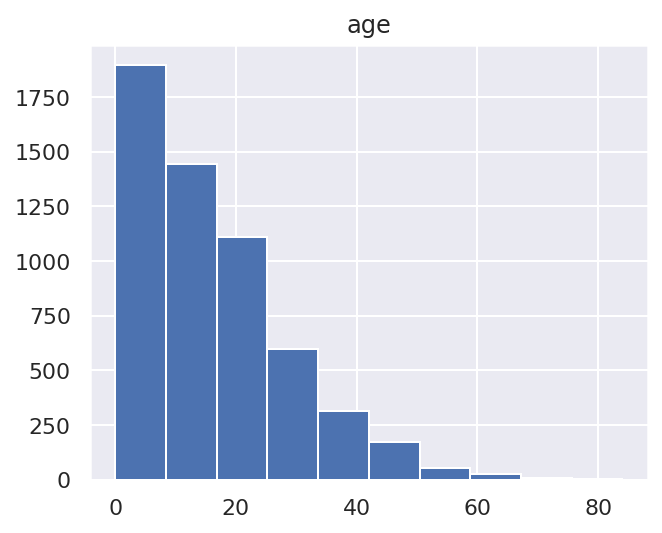

In [11]:
features = ["age"]
D2[features].hist(figsize=(5, 4));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


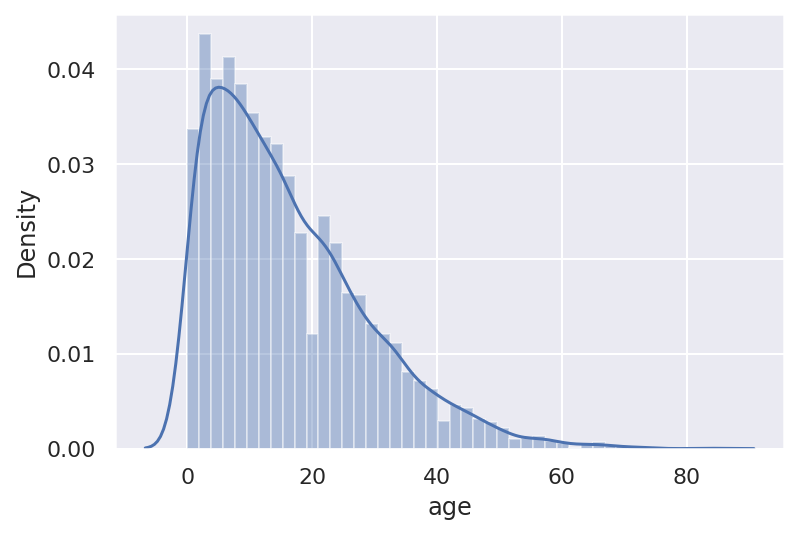

In [12]:
sns.distplot(D2["age"]);

1.2 Gráfica dispersión  edad, peso y sexo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


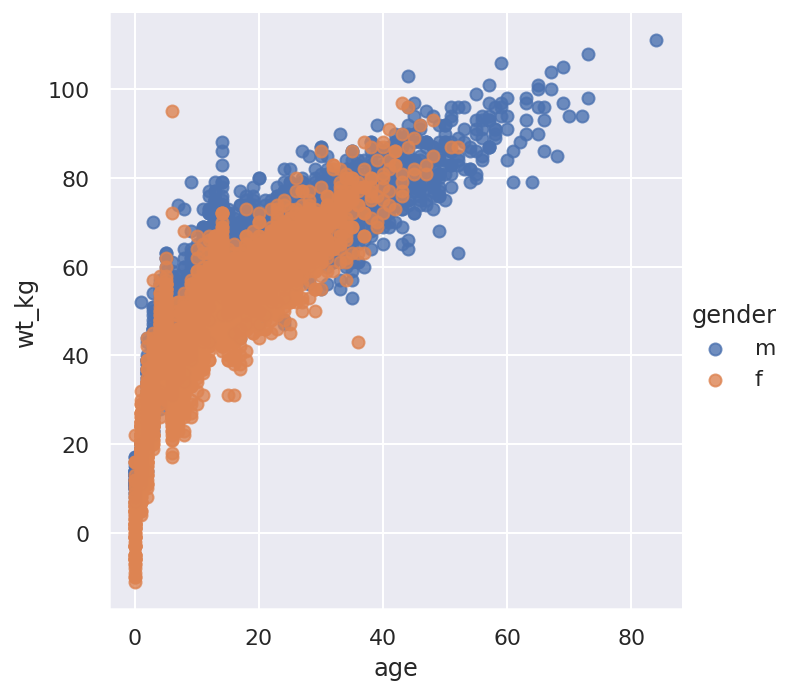

In [13]:
sns.lmplot("age", "wt_kg", data=D2, hue="gender", fit_reg=False);

2.1  Casos a la semana por hospital

In [36]:

D3 = df[['case_id', 'date_hospitalisation','hospital']]
D3.head()

,case_id,date_hospitalisation,hospital
0,5fe599,05/15/2014,Other
1,8689b7,05/14/2014,Missing
2,11f8ea,05/18/2014,St. Mark's Maternity Hospital (SMMH)
3,b8812a,05/20/2014,Port Hospital
4,893f25,05/22/2014,Military Hospital


In [37]:
D3["date_hospitalisation"] = pd.to_datetime(D3["date_hospitalisation"])
D3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,case_id,date_hospitalisation,hospital
0,5fe599,2014-05-15,Other
1,8689b7,2014-05-14,Missing
2,11f8ea,2014-05-18,St. Mark's Maternity Hospital (SMMH)
3,b8812a,2014-05-20,Port Hospital
4,893f25,2014-05-22,Military Hospital
...,...,...,...
5883,76d8fe,2015-04-22,Military Hospital
5884,dd6664,2015-04-24,Port Hospital
5885,635ef3,2015-04-25,Missing
5886,4b859a,2015-04-26,Port Hospital


In [38]:
D3 =D3.groupby(['hospital',pd.Grouper(key='date_hospitalisation',freq='W-MON')]).count()
D3

case_id
hospital                             date_hospitalisation         
Central Hospital                     2014-05-12                  2
                                     2014-05-19                  1
                                     2014-06-02                  2
                                     2014-06-09                  2
                                     2014-06-16                  1
...                                                            ...
St. Mark's Maternity Hospital (SMMH) 2015-04-06                  4
                                     2015-04-13                  5
                                     2015-04-20                  1
                                     2015-04-27                  3
                                     2015-05-04                  2

[313 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


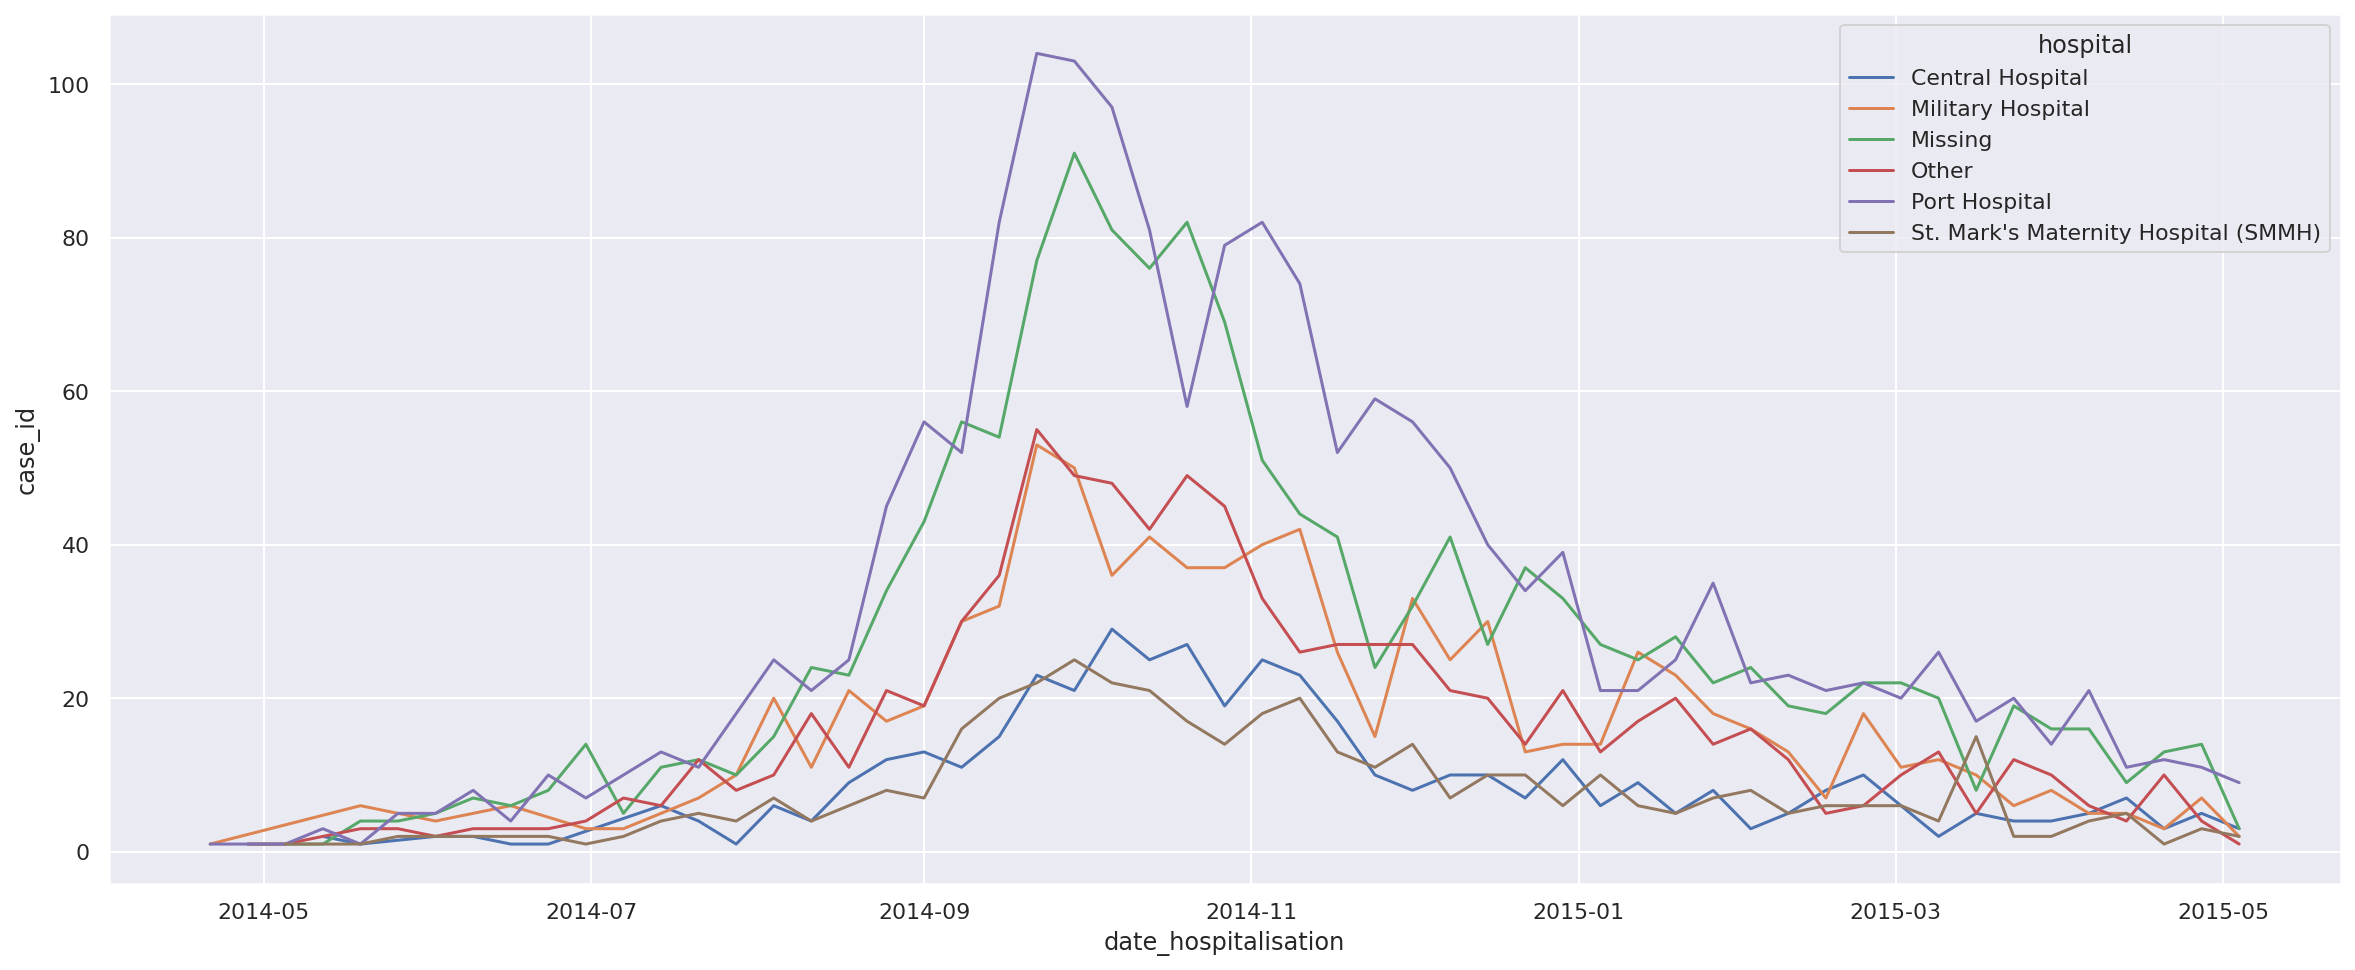

In [39]:
sns.lineplot('date_hospitalisation','case_id',hue='hospital',data=D3)

2.2 Casos por grupo de edad

In [19]:
D4= df[['age_cat']]
D4['cuenta'] = 1
D4 = D4.groupby("age_cat")["cuenta"].count()
D4.to_frame()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cuenta
age_cat,
0-4,1095
10-14,941
15-19,743
20-29,1073
30-49,754
5-9,1095
50-69,95
70+,6


Text(0.5, 1.0, 'Número de hospitalizaciones por grupos de edad')

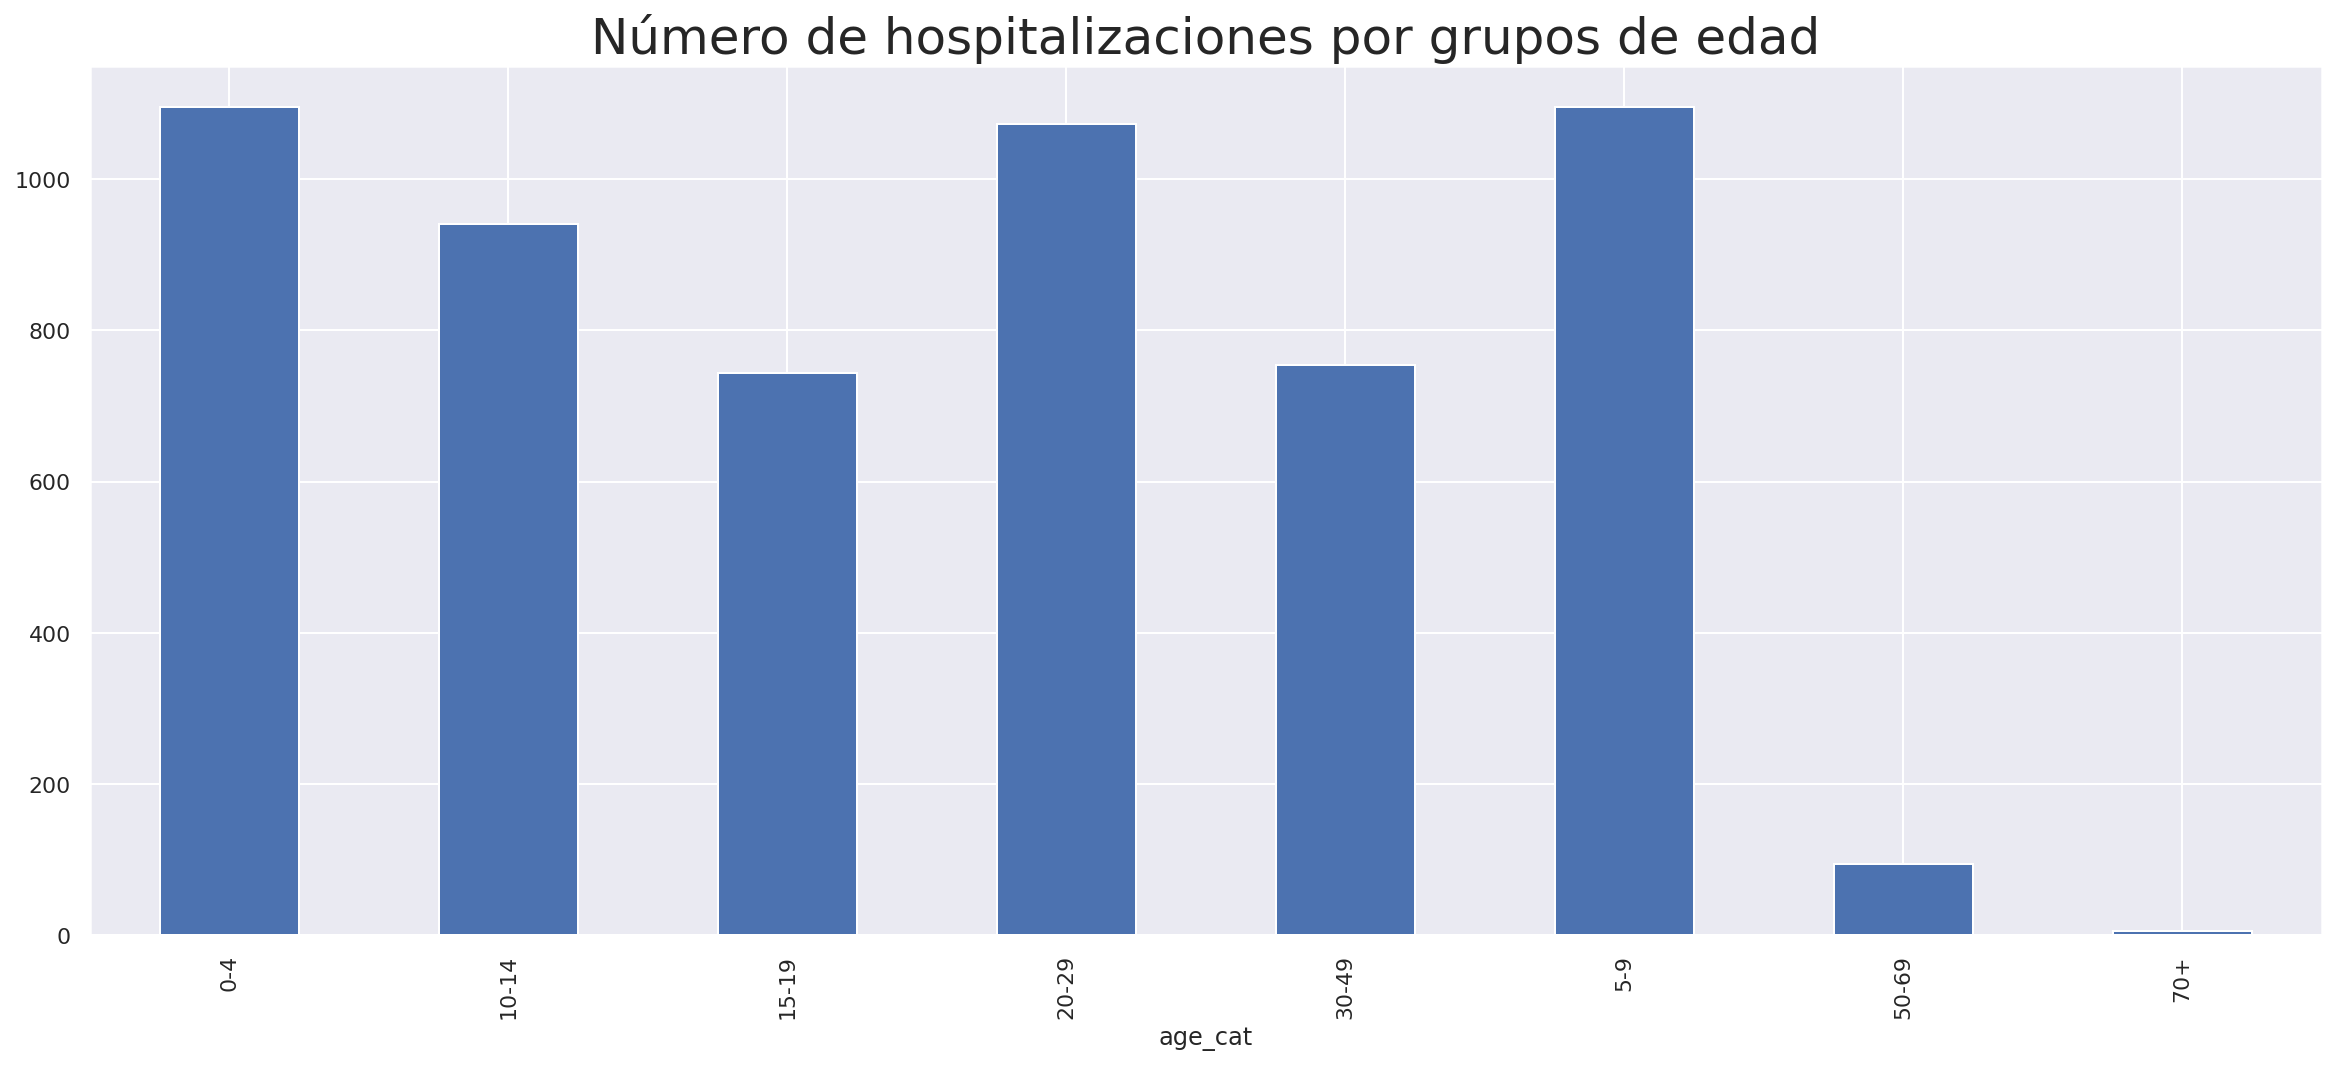

In [44]:
D4.plot.bar()
plt.title('Número de hospitalizaciones por grupos de edad', size=25)

In [126]:

D5 = df[['case_id', 'date_outcome','outcome']]
#Notamos que no hay tantos datos faltantes de los totales, por lo que los eliminamos

D5["date_outcome"] = pd.to_datetime(D5["date_outcome"])
#D5['outcome'].fillna('Unknow', inplace= True)
D5=D5.dropna()
D5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,case_id,date_outcome,outcome
1,8689b7,2014-05-18,Recover
2,11f8ea,2014-05-30,Recover
4,893f25,2014-05-29,Recover
5,be99c8,2014-05-24,Recover
6,07e3e8,2014-06-01,Recover


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


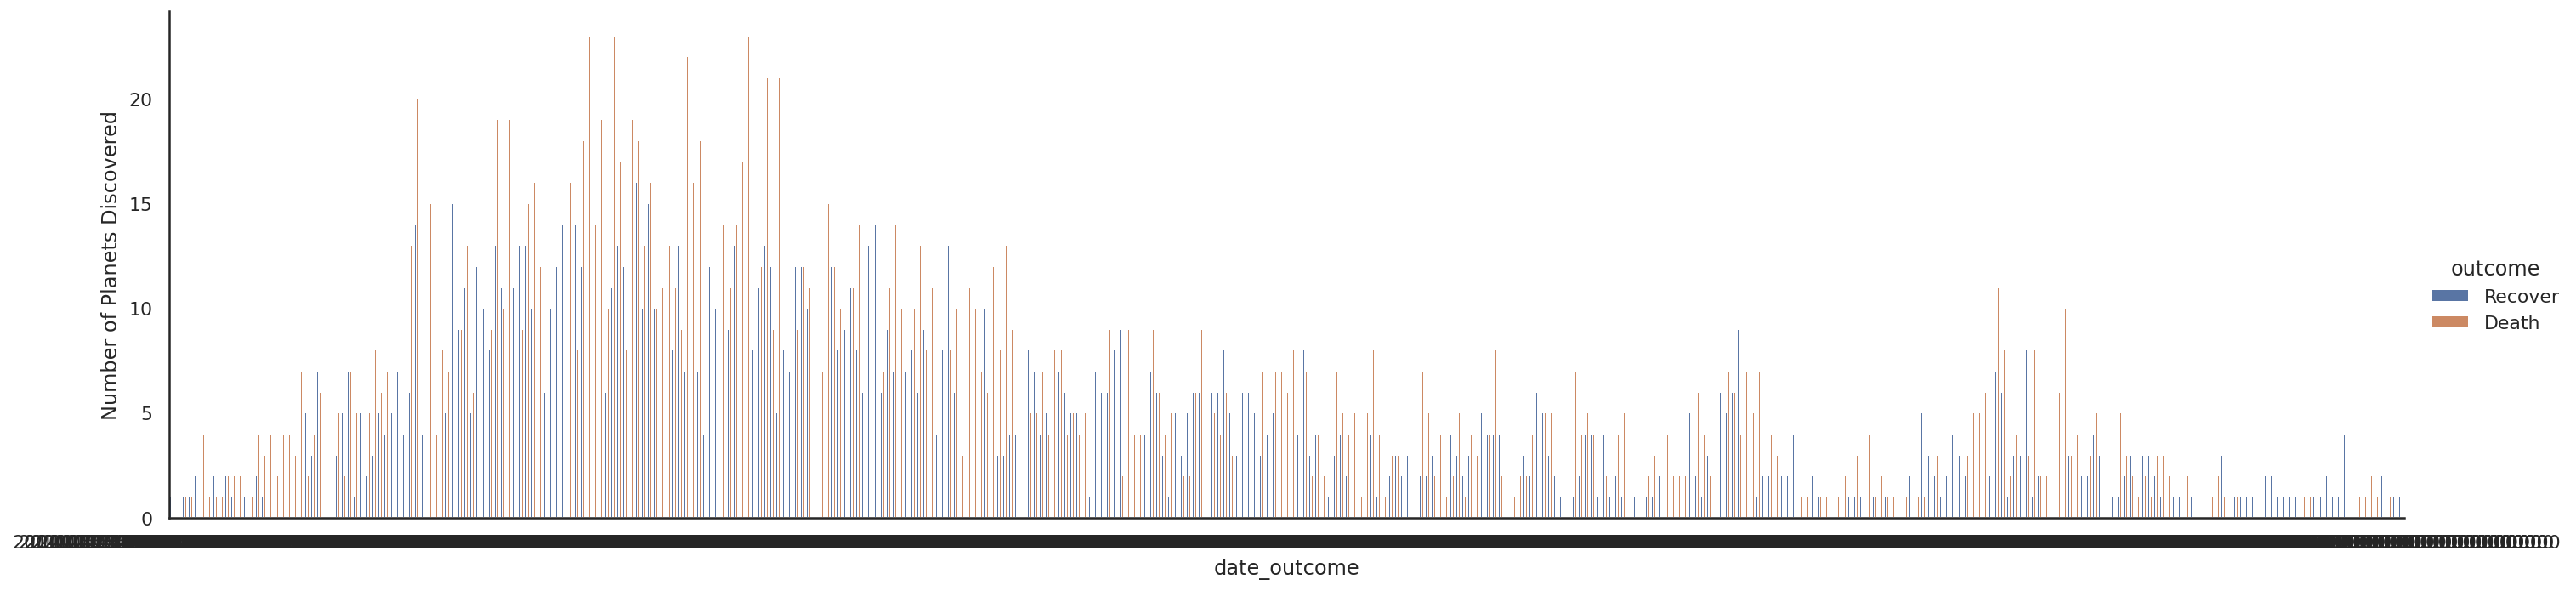

In [127]:


with sns.axes_style('white'):
    g = sns.factorplot("date_outcome", data=D5, aspect=4.0, kind='count',
                       hue='outcome')
    g.set_ylabels('Number of Planets Discovered')



In [85]:
D5['date_hospitalisation']= pd.to_datetime(df['date_hospitalisation'])- pd.to_timedelta(7, unit= 'd')
D5


,case_id,date_outcome,outcome,date_hospitalisation
1,8689b7,2014-05-18,Recover,2014-05-07
2,11f8ea,2014-05-30,Recover,2014-05-11
4,893f25,2014-05-29,Recover,2014-05-15
5,be99c8,2014-05-24,Recover,2014-05-16
6,07e3e8,2014-06-01,Recover,2014-05-22
...,...,...,...,...
5879,bbf39f,2015-04-19,Death,2015-04-12
5880,3da96a,2015-05-20,Recover,2015-04-13
5883,76d8fe,2015-05-06,Recover,2015-04-15
5884,dd6664,2015-04-27,Recover,2015-04-17


In [149]:
#Nos quedamos con las fechas y el outcome
D6=df.loc[:,['date_hospitalisation','outcome']]
D6['date_hospitalisation']=pd.to_datetime(D6['date_hospitalisation'])
D6['outcome'].fillna('Desconocido', inplace= True)
D6=D6.dropna()

muertos=D6[D6['outcome']=='Death']
recuperado=D6[D6['outcome']=='Recover']
desconocido=D6[D6['outcome']=='Desconocido']


recuperado=recuperado.sort_values(by='date_hospitalisation', ascending=True)
recuperado.index=range(len(recuperado))

muertos=muertos.sort_values(by='date_hospitalisation', ascending=True)
muertos.index=range(len(muertos))

desconocido=desconocido.sort_values(by='date_hospitalisation', ascending=True)
desconocido.index=range(len(desconocido))


#Transformamos la fecha y creamos nuevas columnas que nos ayudarán a aagrupar
recuperado['year'] = recuperado['date_hospitalisation'].dt.year
recuperado['month'] = recuperado['date_hospitalisation'].dt.month
recuperado['day'] = recuperado['date_hospitalisation'].dt.day
recuperado['dt']=0
recuperado['week']=0
for i in range(len(recuperado)):
    y=recuperado['year'][i]
    m=recuperado['month'][i]
    d=recuperado['day'][i]
    recuperado['dt'][i]=datetime.date(y,m,d)
    recuperado['dt'][i] = datetime.date(recuperado['year'][i],recuperado['month'][i], recuperado['day'][i])
    recuperado['week'][i]=recuperado['dt'][i].isocalendar()[1]
recuperado['year'] = recuperado['year'].astype(int)


muertos['year'] = muertos['date_hospitalisation'].dt.year
muertos['month'] = muertos['date_hospitalisation'].dt.month
muertos['day'] = muertos['date_hospitalisation'].dt.day
muertos['dt']=0
muertos['week']=0
for i in range(len(muertos)):
    y=muertos['year'][i]
    m=muertos['month'][i]
    d=muertos['day'][i]
    muertos['dt'][i]=datetime.date(y,m,d)
    muertos['dt'][i] = datetime.date(muertos['year'][i],muertos['month'][i], muertos['day'][i])
    muertos['week'][i]=muertos['dt'][i].isocalendar()[1]
muertos['year'] = muertos['year'].astype(int)


desconocido['year'] = desconocido['date_hospitalisation'].dt.year
desconocido['month'] = desconocido['date_hospitalisation'].dt.month
desconocido['day'] = desconocido['date_hospitalisation'].dt.day
desconocido['dt']=0
desconocido['week']=0
for i in range(len(desconocido)):
    y=desconocido['year'][i]
    m=desconocido['month'][i]
    d=desconocido['day'][i]
    desconocido['dt'][i]=datetime.date(y,m,d)
    desconocido['dt'][i] = datetime.date(desconocido['year'][i],desconocido['month'][i], desconocido['day'][i])
    desconocido['week'][i]=desconocido['dt'][i].isocalendar()[1]
desconocido['year'] = desconocido['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to b

In [151]:
muertos2014=muertos[muertos['year']==2014].groupby('week')
muertos2014=muertos2014.size().reset_index(name='counts')


muertos2015=muertos[muertos['year']==2015].groupby('week')
muertos2015=muertos2015.size().reset_index(name='counts')


recuperados2014=recuperado[recuperado['year']==2014].groupby('week')
recuperados2014=recuperados2014.size().reset_index(name='counts')


recuperados2015=recuperado[recuperado['year']==2015].groupby('week')
recuperados2015=recuperados2015.size().reset_index(name='counts')


desconocido2014=desconocido[recuperado['year']==2014].groupby('week')
desconocido2014=desconocido2014.size().reset_index(name='counts')


desconocido2015=desconocido[desconocido['year']==2015].groupby('week')
desconocido2015=desconocido2015.size().reset_index(name='counts')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Text(0.5, 1.0, 'Casos semanales outcome')

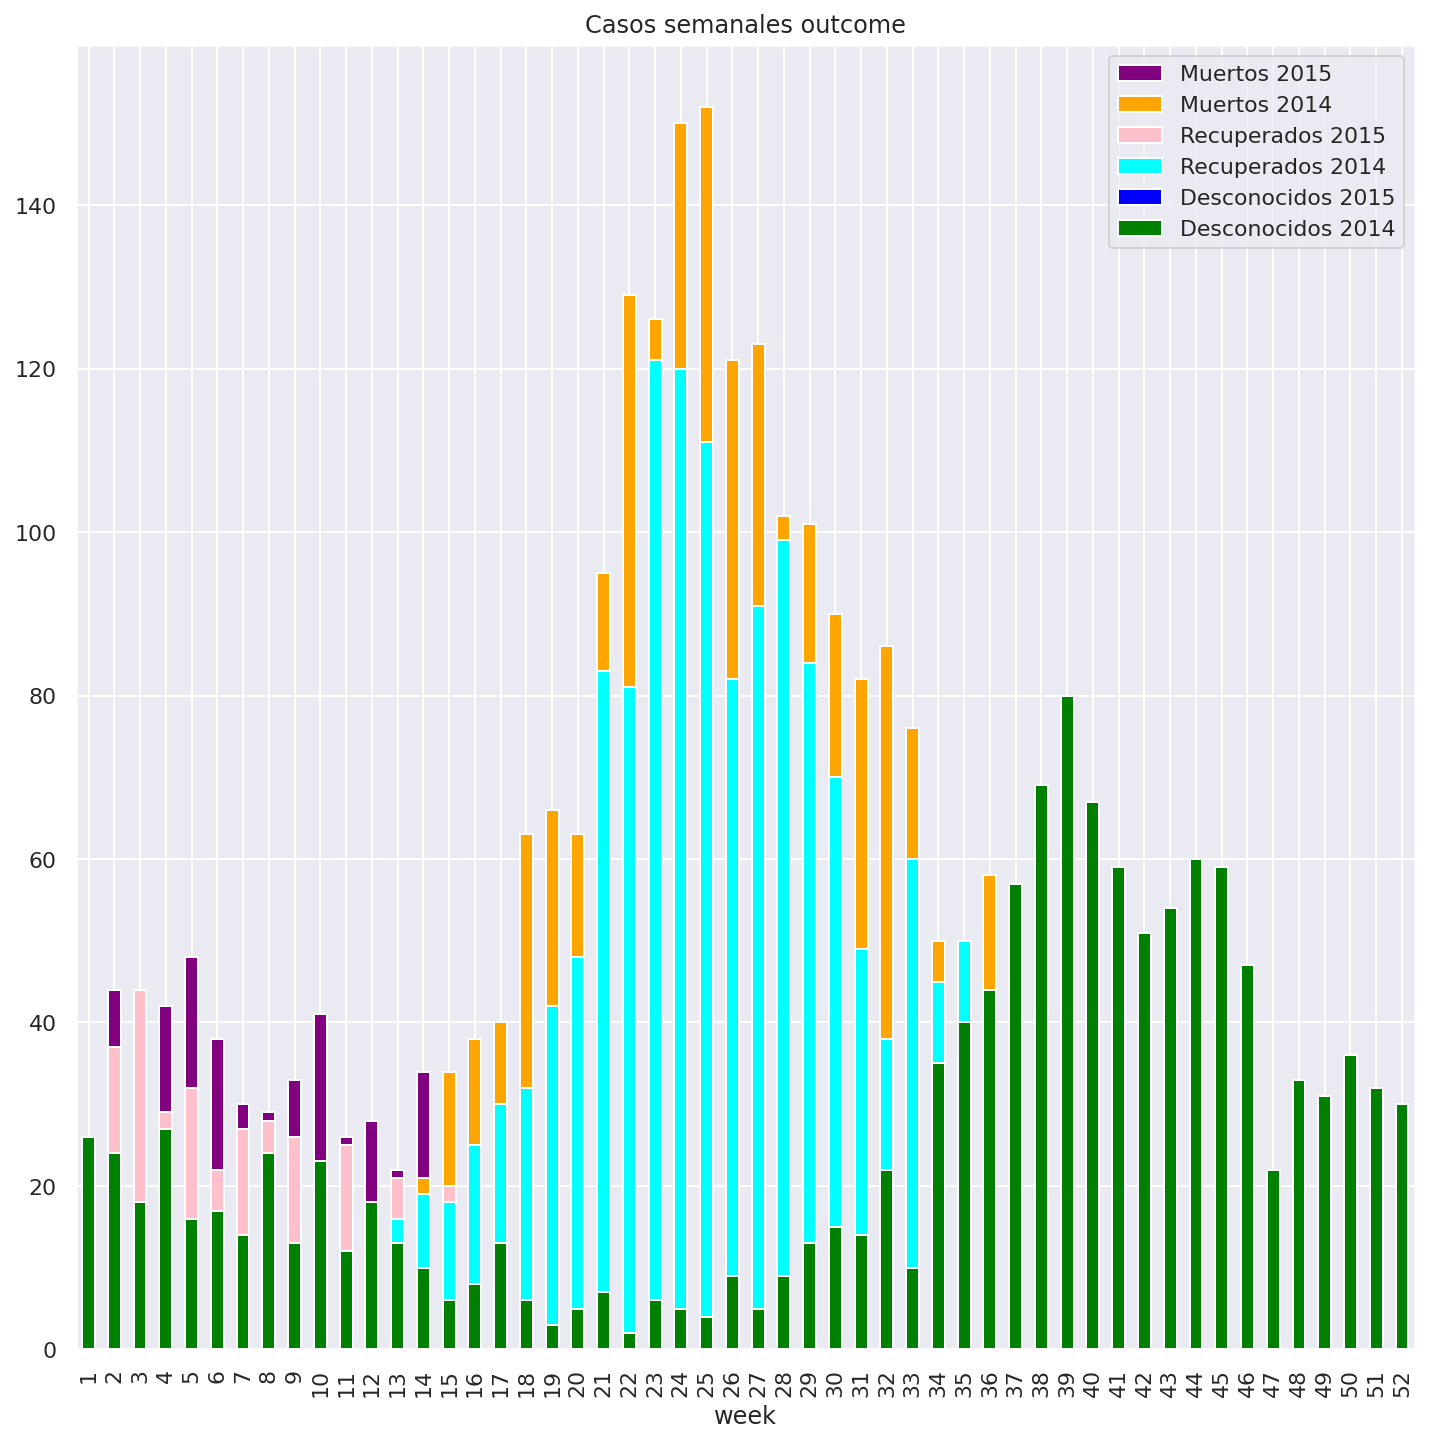

In [154]:
fig, ax = plt.subplots()


muertos2015.plot(x='week', y='counts',kind='bar',label='Muertos 2015',color='purple', figsize=[12,12],xlim=[1,17], ax=ax)
muertos2014.plot(x='week', y='counts',kind='bar',label='Muertos 2014',color='orange', figsize=[12,12],xlim=[1,17], ax=ax)
recuperados2015.plot(x='week', y='counts',kind='bar',label='Recuperados 2015',color='pink', figsize=[12,12],xlim=[1,17], ax=ax)
recuperados2014.plot(x='week', y='counts',kind='bar',label='Recuperados 2014',color='cyan', figsize=[12,12],xlim=[1,17], ax=ax)
desconocido2015.plot(x='week', y='counts',kind='bar',label='Desconocidos 2015',color='blue', figsize=[12,12],xlim=[1,17], ax=ax)
desconocido2014.plot(x='week', y='counts',kind='bar',label='Desconocidos 2014',color='green', figsize=[12,12],xlim=[1,17], ax=ax)
plt.title("Casos semanales outcome")